In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import folium
from folium.plugins import MarkerCluster


In [85]:
crime_data = pd.read_csv('Crime_Data_from_2020_to_Present.csv', sep= ',')
crime_data1 = pd.read_csv('Crime_Data_from_2020_to_Present.csv', sep= ',')


crime_data['Date Rptd'] = pd.to_datetime(crime_data['Date Rptd'], errors='coerce')
crime_data = crime_data[crime_data['Vict Sex'].isin(['M', 'F'])]
crime_data = crime_data[crime_data['Vict Descent'].isin(['W', 'B','O','A' ,'H'])]
crime_data = pd.DataFrame(crime_data,columns=['AREA','AREA NAME','Date Rptd','Crm Cd', 'Crm Cd Desc','Vict Age', 'Vict Sex', 'Vict Descent','Crm Cd 1',
       'LOCATION', 'LAT','LON','Weapon Desc','Status Desc'])


In [86]:
# Custom serialization for Timestamp objects
def datetime_handler(x):
    if isinstance(x, pd.Timestamp):
        return x.strftime('%Y-%m-%d %H:%M:%S')
    raise TypeError("Unknown type")

# Assuming you have a DataFrame named crime_data
# crime_data = pd.DataFrame(...) 

with open('California_Crime_Data.json', 'w') as file:
    data_as_dict = crime_data.to_dict(orient='records')
    json.dump(data_as_dict, file, indent=4, default=datetime_handler)

In [87]:
# Filtering the dataset into the different regions of California

cent_data = crime_data[crime_data['AREA'] == 1]
rampart_data = crime_data[crime_data['AREA'] == 2]
SW_data = crime_data[crime_data['AREA'] == 3]
hollenbeck_datadata = crime_data[crime_data['AREA'] == 4]
harbour_data = crime_data[crime_data['AREA'] == 5]
hollywood_data = crime_data[crime_data['AREA'] == 6]
wilshire_data = crime_data[crime_data['AREA'] == 7]
westLA_data = crime_data[crime_data['AREA'] == 8]
van_nuys_data = crime_data[crime_data['AREA'] == 9]
west_Valley_data = crime_data[crime_data['AREA'] == 10]
north_East_data = crime_data[crime_data['AREA'] == 11]
street_77_data = crime_data[crime_data['AREA'] == 12]
newton_data = crime_data[crime_data['AREA'] == 13]
pacific_data = crime_data[crime_data['AREA'] == 14]
n_hollywood_data = crime_data[crime_data['AREA'] == 15]
foothill_data = crime_data[crime_data['AREA'] == 16]
devonshire_data = crime_data[crime_data['AREA'] == 17]
south_east_data = crime_data[crime_data['AREA'] == 18]
mission_data = crime_data[crime_data['AREA'] == 19]
olympic_data = crime_data[crime_data['AREA'] == 20]
topanga_data = crime_data[crime_data['AREA'] == 21]

In [ ]:
crime_data_count = crime_data['Crm Cd Desc'].value_counts()

crime_data_count

In [88]:
# Create a copy of the filtered data
murder_data = crime_data[crime_data['Crm Cd Desc'] == 'CRIMINAL HOMICIDE'].copy()

murder_data = crime_data[crime_data['Crm Cd Desc'] == 'CRIMINAL HOMICIDE']
murder_data['Date Rptd'] = pd.to_datetime(murder_data['Date Rptd'], errors='coerce')

# Filter based on year
murder_data_2020 = murder_data[murder_data['Date Rptd'].dt.year == 2020]
murder_data_2021 = murder_data[murder_data['Date Rptd'].dt.year == 2021]
murder_data_2022 = murder_data[murder_data['Date Rptd'].dt.year == 2022]
murder_data_2023 = murder_data[murder_data['Date Rptd'].dt.year == 2023]

# Extract weapon descriptions for 2020
murder_methods = murder_data['Weapon Desc'].value_counts()
murder_2020_methods = murder_data_2020['Weapon Desc'].value_counts()
murder_2021_methods = murder_data_2021['Weapon Desc'].value_counts()
murder_2022_methods = murder_data_2022['Weapon Desc'].value_counts()
murder_2023_methods = murder_data_2023['Weapon Desc'].value_counts()

unknown_cutting = murder_data[murder_data['Weapon Desc'] == "UNKNOWN TYPE CUTTING INSTRUMENT"]
unknown_weapon = murder_data[murder_data['Weapon Desc'] == "UNKNOWN WEAPON/OTHER WEAPON"]

unknown_murders = pd.concat([unknown_cutting, unknown_weapon], axis=0)


C:\Users\thoma\AppData\Local\Temp\ipykernel_3128\4098587931.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  murder_data['Date Rptd'] = pd.to_datetime(murder_data['Date Rptd'], errors='coerce')


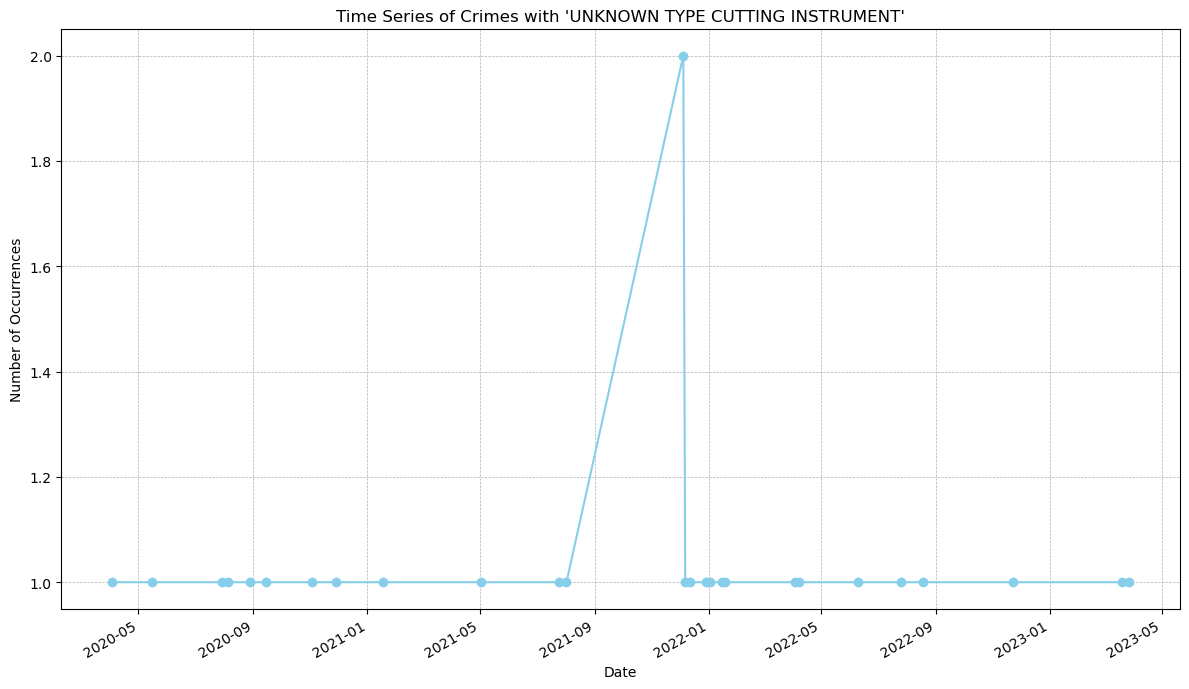

In [89]:
# Group by 'Date Rptd' and count occurrences on each date
time_series_data = unknown_cutting.groupby('Date Rptd').size()

# Plotting the time series data
plt.figure(figsize=(12,7))
time_series_data.plot(color='skyblue', marker='o')
plt.title("Time Series of Crimes with 'UNKNOWN TYPE CUTTING INSTRUMENT'")
plt.xlabel("Date")
plt.ylabel("Number of Occurrences")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

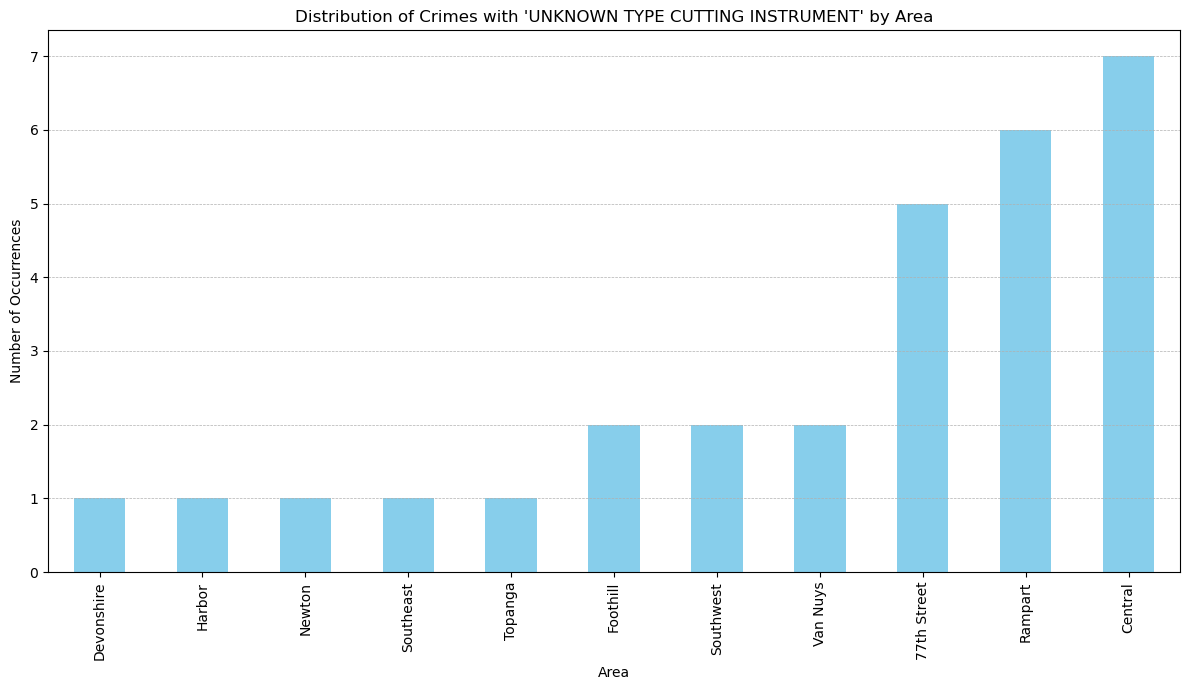

In [90]:
# Group by 'AREA' and count the occurrences for each area
area_counts = unknown_cutting.groupby('AREA NAME').size().sort_values()

# Plotting the histogram (bar chart) for the counts based on area
plt.figure(figsize=(12,7))
area_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution of Crimes with 'UNKNOWN TYPE CUTTING INSTRUMENT' by Area")
plt.xlabel("Area")
plt.ylabel("Number of Occurrences")
plt.grid(axis='y', which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

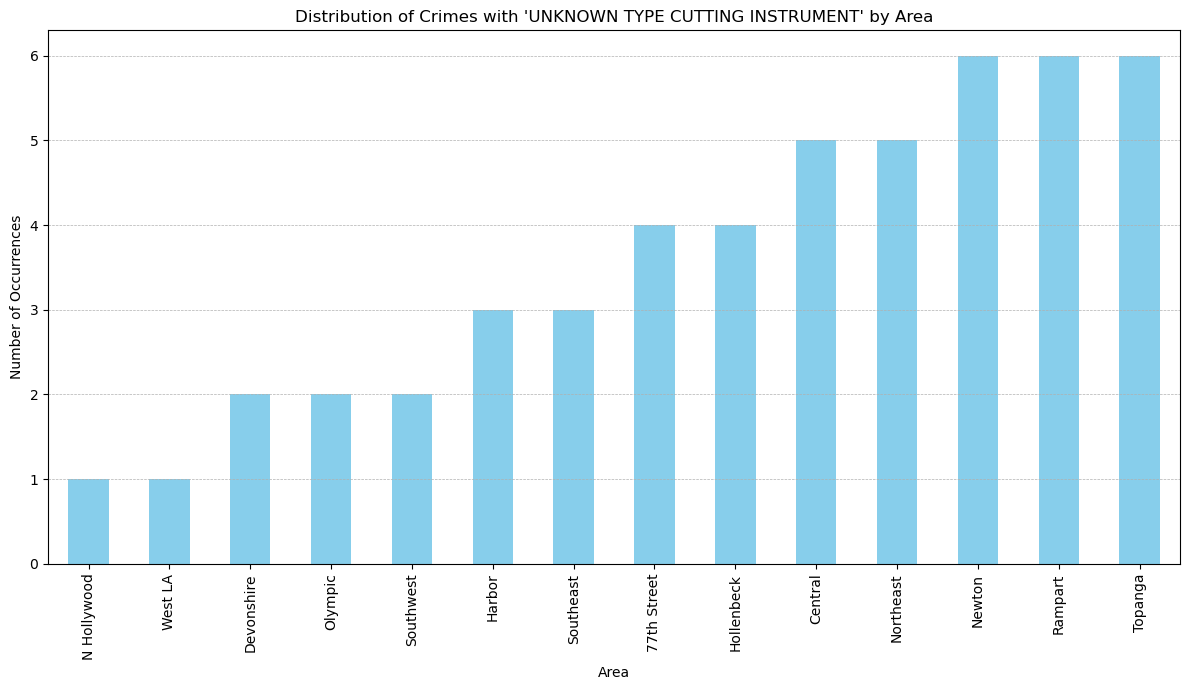

In [93]:
# Group by 'AREA' and count the occurrences for each area
area_counts2 = unknown_weapon.groupby('AREA NAME').size().sort_values()

# Plotting the histogram (bar chart) for the counts based on area
plt.figure(figsize=(12,7))
area_counts2.plot(kind='bar', color='skyblue')
plt.title("Distribution of Crimes with 'UNKNOWN TYPE CUTTING INSTRUMENT' by Area")
plt.xlabel("Area")
plt.ylabel("Number of Occurrences")
plt.grid(axis='y', which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

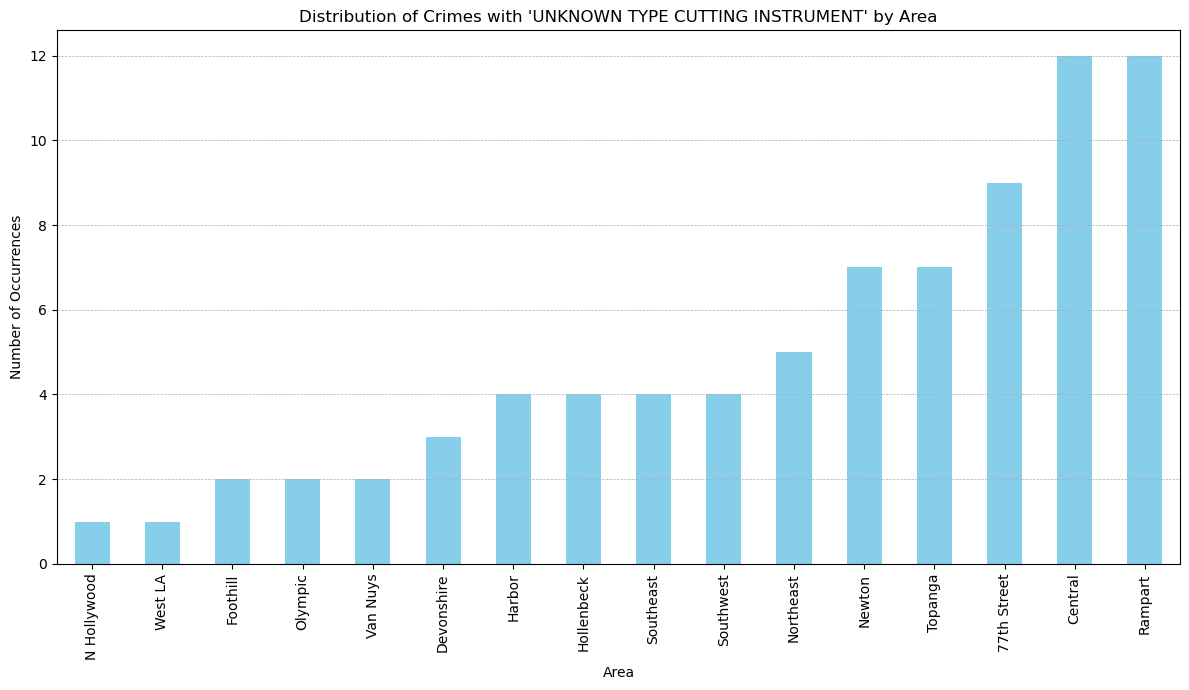

In [94]:
# Group by 'AREA' and count the occurrences for each area
area_counts3 = unknown_murders.groupby('AREA NAME').size().sort_values()

# Plotting the histogram (bar chart) for the counts based on area
plt.figure(figsize=(12,7))
area_counts3.plot(kind='bar', color='skyblue')
plt.title("Distribution of Crimes with 'UNKNOWN TYPE CUTTING INSTRUMENT' by Area")
plt.xlabel("Area")
plt.ylabel("Number of Occurrences")
plt.grid(axis='y', which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [95]:
# Initialize the map again with the correct column references
m_corrected = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

# Create distinct FeatureGroups for each year and add to the map
for year in unknown_cutting['Date Rptd'].dt.year.unique():
    year_data = unknown_cutting[unknown_cutting['Date Rptd'].dt.year == year]
    
    feature_group = folium.FeatureGroup(name=str(year))
    
    # Marker cluster for the feature group
    marker_cluster = MarkerCluster().add_to(feature_group)
    
    for idx, row in year_data.iterrows():
        label = f"""
        AREA: {row['AREA']}<br>
        Date: {row['Date Rptd']}<br>
        Victim Age: {row['Vict Age']}<br>
        Victim Descent: {row['Vict Descent']}<br>
        Victim Gender: {row['Vict Sex']}
        Status Desc: {row['Status Desc']} 
        """
        folium.Marker(
            location=[row['LAT'], row['LON']],
            popup=label,
            icon=folium.Icon(color='blue')
        ).add_to(marker_cluster)
    
    feature_group.add_to(m_corrected)

# Add layer control
folium.LayerControl().add_to(m_corrected)

m_corrected


In [96]:
# Initialize the map again with the correct column references
m_corrected = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

# Create distinct FeatureGroups for each year and add to the map
for year in unknown_weapon['Date Rptd'].dt.year.unique():
    year_data = unknown_weapon[unknown_weapon['Date Rptd'].dt.year == year]
    
    feature_group = folium.FeatureGroup(name=str(year))
    
    # Marker cluster for the feature group
    marker_cluster = MarkerCluster().add_to(feature_group)
    
    for idx, row in year_data.iterrows():
        label = f"""
        AREA: {row['AREA']}<br>
        Date: {row['Date Rptd']}<br>
        Victim Age: {row['Vict Age']}<br>
        Victim Descent: {row['Vict Descent']}<br>
        Victim Gender: {row['Vict Sex']}
        Status Desc: {row['Status Desc']} 
        """
        folium.Marker(
            location=[row['LAT'], row['LON']],
            popup=label,
            icon=folium.Icon(color='blue')
        ).add_to(marker_cluster)
    
    feature_group.add_to(m_corrected)

# Add layer control
folium.LayerControl().add_to(m_corrected)

m_corrected


In [97]:
# Initialize the map again with the correct column references
m_corrected = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

# Create distinct FeatureGroups for each year and add to the map
for year in unknown_murders['Date Rptd'].dt.year.unique():
    year_data = unknown_murders[unknown_murders['Date Rptd'].dt.year == year]
    
    feature_group = folium.FeatureGroup(name=str(year))
    
    for idx, row in year_data.iterrows():
        label = f"""
        AREA: {row['AREA']}<br>
        Date: {row['Date Rptd']}<br>
        Victim Age: {row['Vict Age']}<br>
        Victim Descent: {row['Vict Descent']}<br>
        Victim Gender: {row['Vict Sex']}
        Status Desc: {row['Status Desc']} 
        """
        folium.Marker(
            location=[row['LAT'], row['LON']],
            popup=label,
            icon=folium.Icon(color='blue')
        ).add_to(feature_group)  # Add marker directly to the feature_group
    
    feature_group.add_to(m_corrected)

# Add layer control
folium.LayerControl().add_to(m_corrected)

m_corrected


In [98]:
# Initialize the map again with the correct column references
m_corrected = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

# Create distinct FeatureGroups for each year and add to the map
for year in murder_data['Date Rptd'].dt.year.unique():
    year_data = murder_data[murder_data['Date Rptd'].dt.year == year]
    
    feature_group = folium.FeatureGroup(name=str(year))
    
    # Marker cluster for the feature group
    marker_cluster = MarkerCluster().add_to(feature_group)
    
    for idx, row in year_data.iterrows():
        label = f"""
        AREA: {row['AREA']}<br>
        Date: {row['Date Rptd']}<br>
        Victim Age: {row['Vict Age']}<br>
        Victim Descent: {row['Vict Descent']}<br>
        Victim Gender: {row['Vict Sex']}
        Weapon Desc: {row['Weapon Desc']}
        Status Desc: {row['Status Desc']} 
        """
        folium.Marker(
            location=[row['LAT'], row['LON']],
            popup=label,
            icon=folium.Icon(color='blue')
        ).add_to(marker_cluster)
    
    feature_group.add_to(m_corrected)

# Add layer control
folium.LayerControl().add_to(m_corrected)

m_corrected


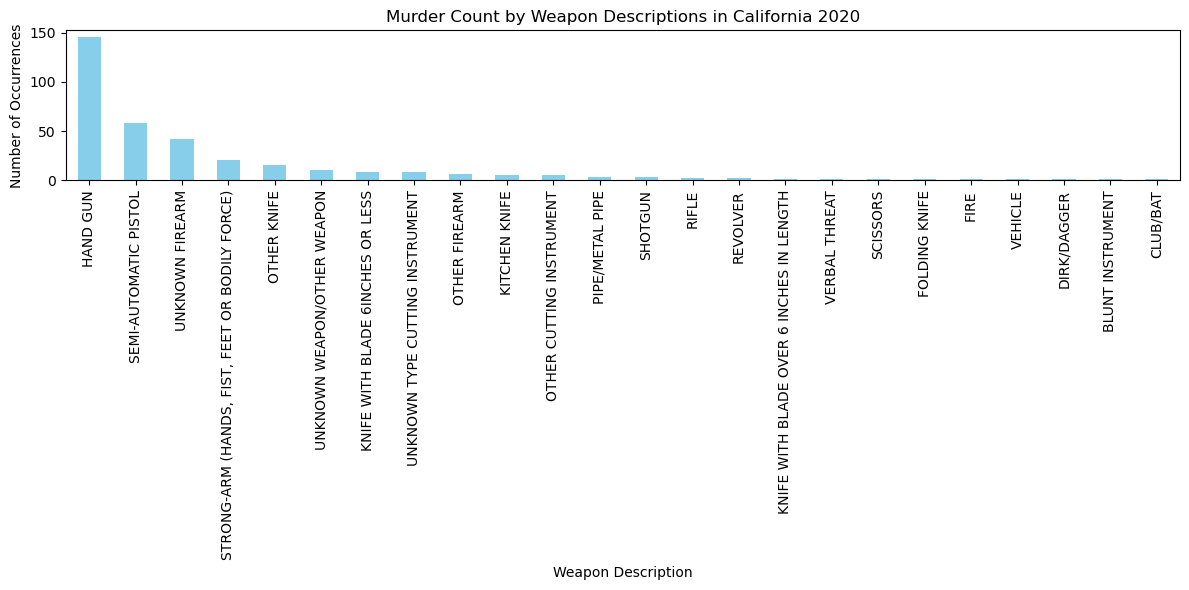

In [99]:
# Plotting the histogram for the filtered data
plt.figure(figsize=(12,6))
murder_2020_methods.plot(kind='bar', color='skyblue')
plt.title("Murder Count by Weapon Descriptions in California 2020")
plt.xlabel("Weapon Description")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=90,fontsize=10)
plt.tight_layout()
plt.show()

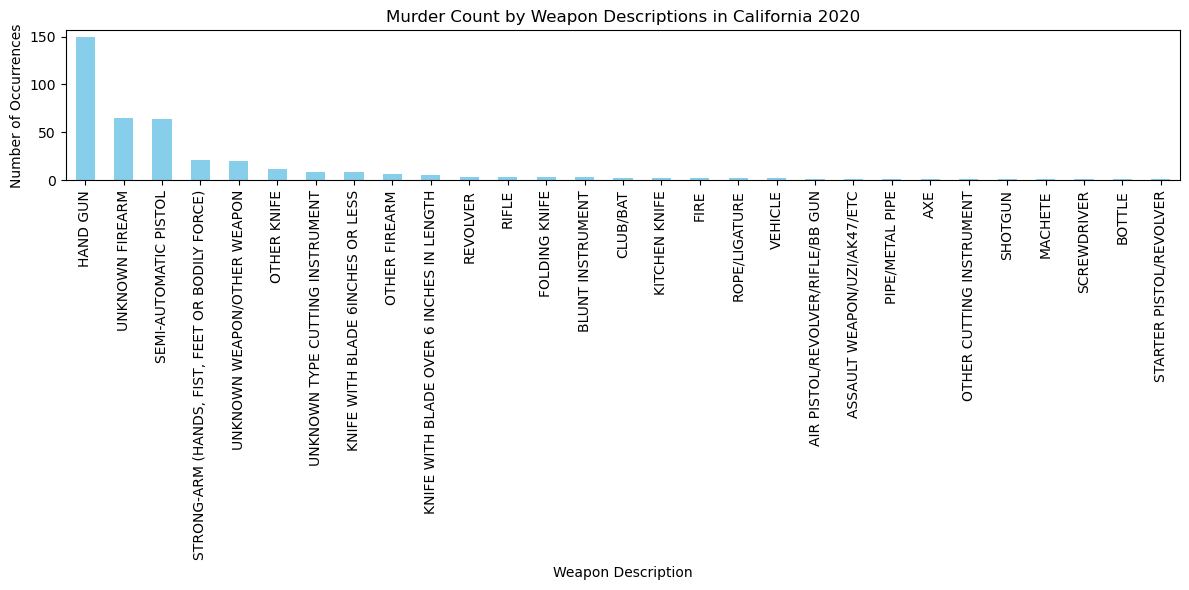

In [100]:
# Plotting the histogram for the filtered data
plt.figure(figsize=(12,6))
murder_2021_methods.plot(kind='bar', color='skyblue')
plt.title("Murder Count by Weapon Descriptions in California 2021")
plt.xlabel("Weapon Description")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=90,fontsize=10)
plt.tight_layout()
plt.show()

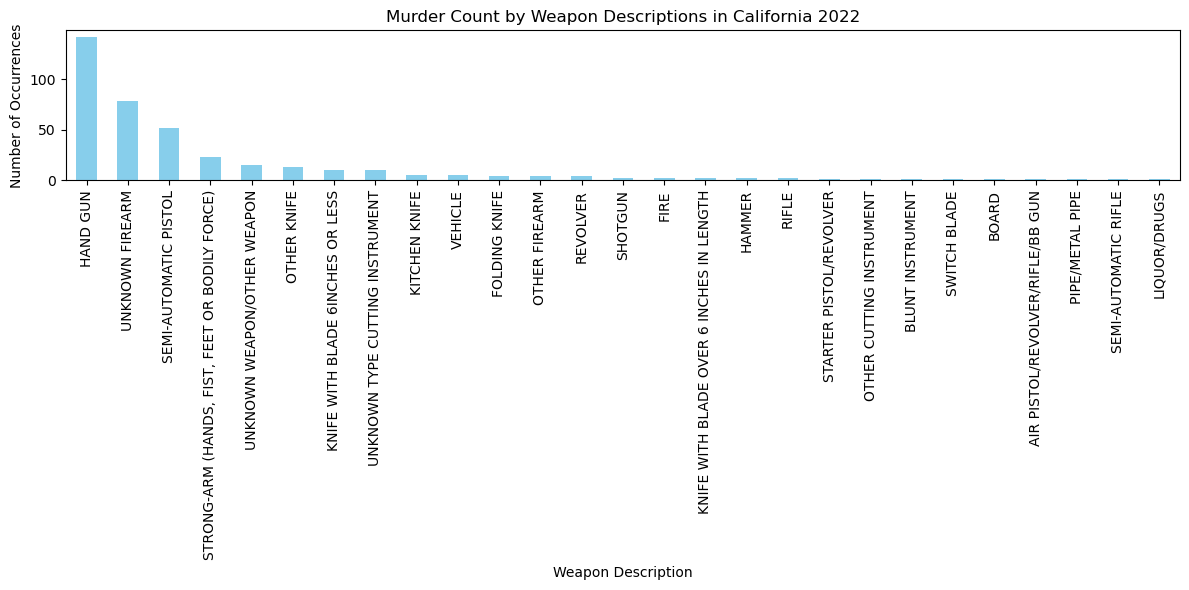

In [101]:
# Plotting the histogram for the filtered data
plt.figure(figsize=(12,6))
murder_2022_methods.plot(kind='bar', color='skyblue')
plt.title("Murder Count by Weapon Descriptions in California 2022")
plt.xlabel("Weapon Description")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=90,fontsize=10)
plt.tight_layout()
plt.show()

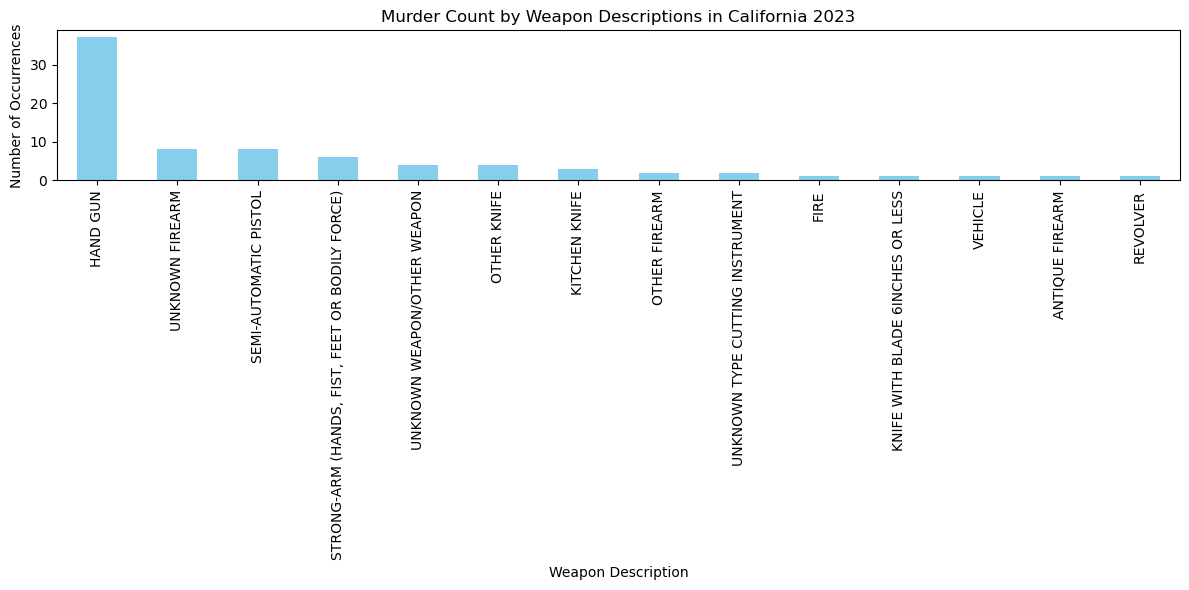

In [102]:
# Plotting the histogram for the filtered data
plt.figure(figsize=(12,6))
murder_2023_methods.plot(kind='bar', color='skyblue')
plt.title("Murder Count by Weapon Descriptions in California 2023")
plt.xlabel("Weapon Description")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=90,fontsize=10)
plt.tight_layout()
plt.show()

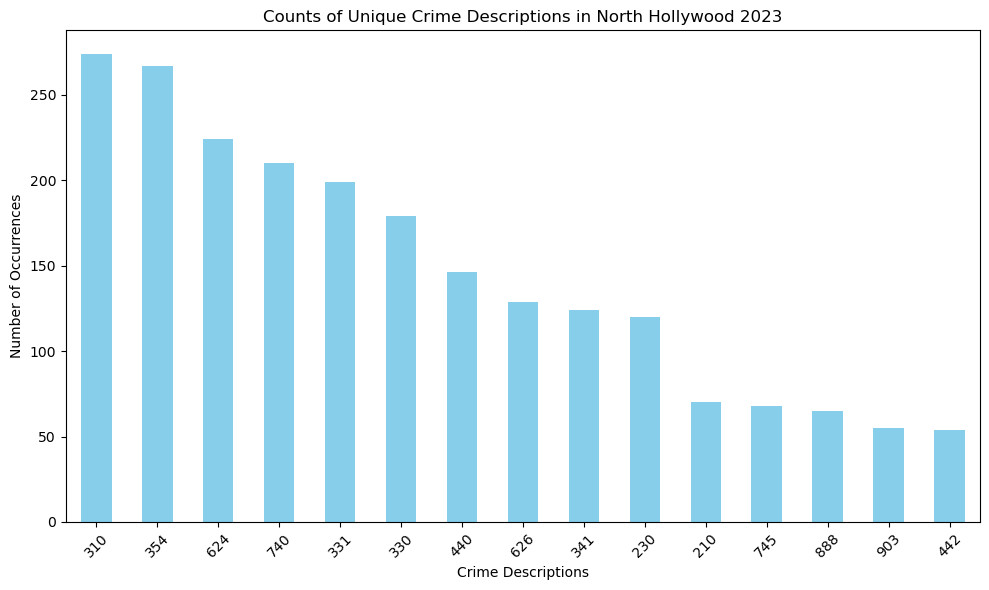

In [ ]:
# Plotting the histogram for the filtered data
plt.figure(figsize=(10,6))
n_hollywood_2023_vals.plot(kind='bar', color='skyblue')
plt.title("Counts of Unique Crime Descriptions in North Hollywood 2023")
plt.xlabel("Crime Descriptions")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 2020 Top Crime = Theft Vehicle
n_hollywood_2020_top = n_hollywood_2020[n_hollywood_2020['Crm Cd'] == 330]

# 2021 Top Crime = Theft Vehicle
n_hollywood_2021_top = n_hollywood_2021[n_hollywood_2021['Crm Cd']== 330]

# 2022 Top Crime = Identity Theft
n_hollywood_2022_top = n_hollywood_2022[n_hollywood_2022['Crm Cd']== 354]

# 2023 Top Crime = Burglery
n_hollywood_2023_top = n_hollywood_2023[n_hollywood_2023['Crm Cd']== 310]


In [ ]:
n_hollywood_2020_top_gender = n_hollywood_2020['Vict Sex'].value_counts()
n_hollywood_2021_top_gender = n_hollywood_2021['Vict Sex'].value_counts()
n_hollywood_2022_top_gender = n_hollywood_2022['Vict Sex'].value_counts()
n_hollywood_2023_top_gender = n_hollywood_2023['Vict Sex'].value_counts()

n_hollywood_2020_top_gendif = n_hollywood_2020_top_gender.loc['M'] - n_hollywood_2020_top_gender.loc['F']
n_hollywood_2021_top_gendif = n_hollywood_2021_top_gender.loc['M'] - n_hollywood_2021_top_gender.loc['F']
n_hollywood_2022_top_gendif = n_hollywood_2022_top_gender.loc['M'] - n_hollywood_2022_top_gender.loc['F']
n_hollywood_2023_top_gendif = n_hollywood_2023_top_gender.loc['M'] - n_hollywood_2023_top_gender.loc['F']




354

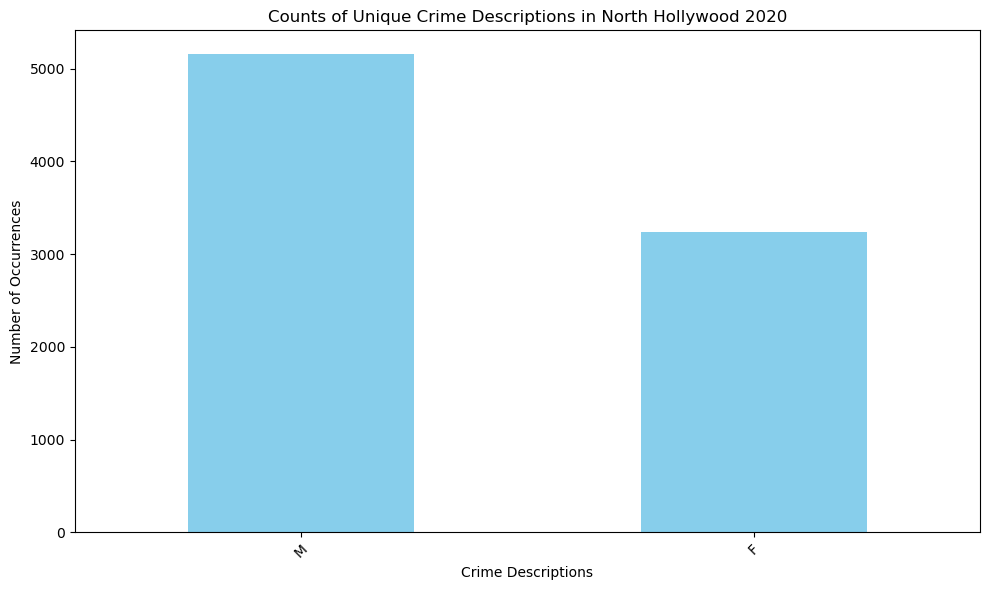

In [ ]:
# Plotting the histogram for the filtered data
plt.figure(figsize=(10,6))
n_hollywood_2020_top_gender.plot(kind='bar', color='skyblue')
plt.title("Counts of Unique Crime Descriptions in North Hollywood 2020")
plt.xlabel("Crime Descriptions")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

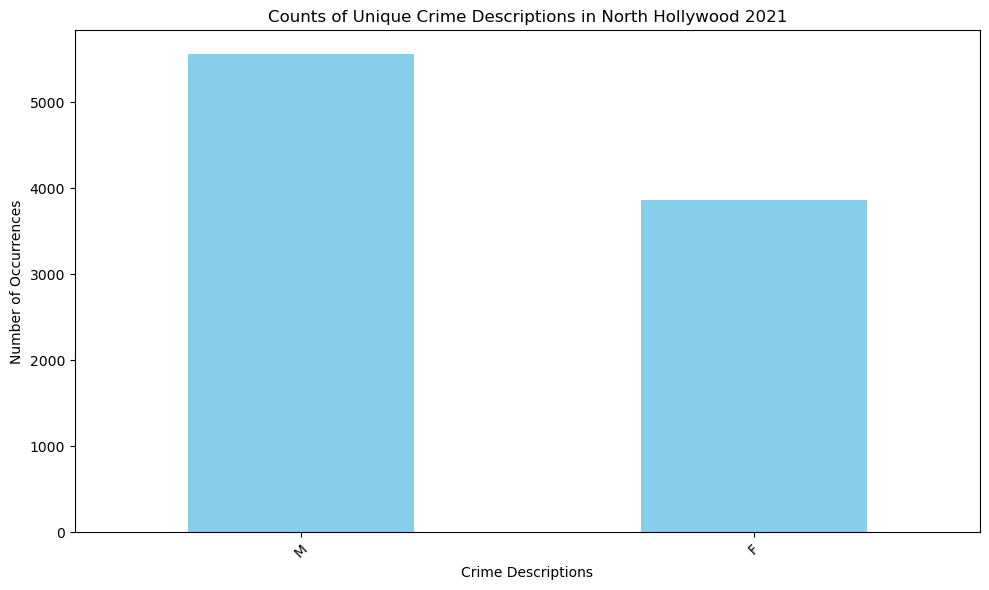

In [ ]:
# Plotting the histogram for the filtered data
plt.figure(figsize=(10,6))
n_hollywood_2021_top_gender.plot(kind='bar', color='skyblue')
plt.title("Counts of Unique Crime Descriptions in North Hollywood 2021")
plt.xlabel("Crime Descriptions")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

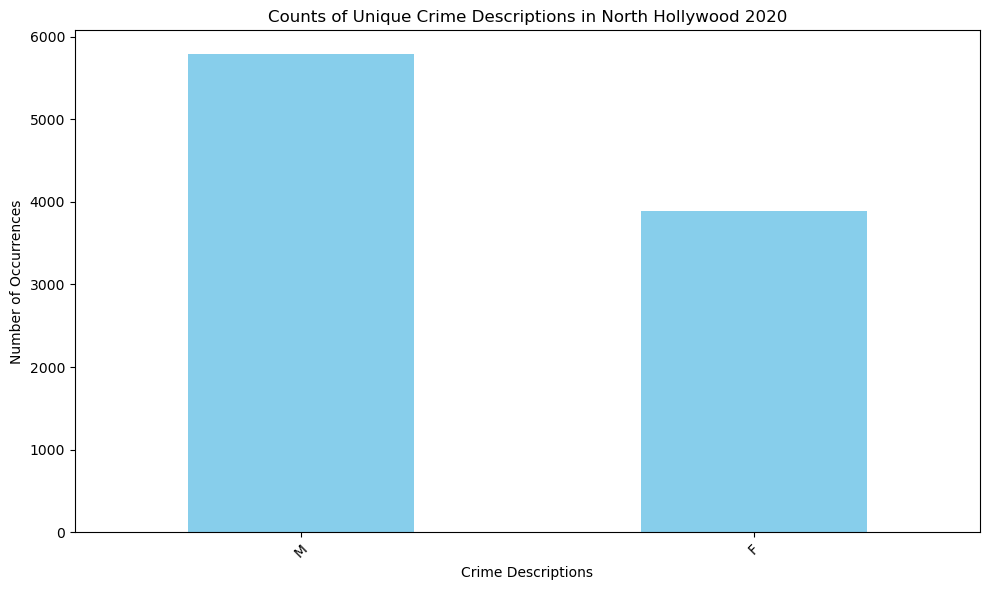

In [ ]:
# Plotting the histogram for the filtered data
plt.figure(figsize=(10,6))
n_hollywood_2022_top_gender.plot(kind='bar', color='skyblue')
plt.title("Counts of Unique Crime Descriptions in North Hollywood 2020")
plt.xlabel("Crime Descriptions")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

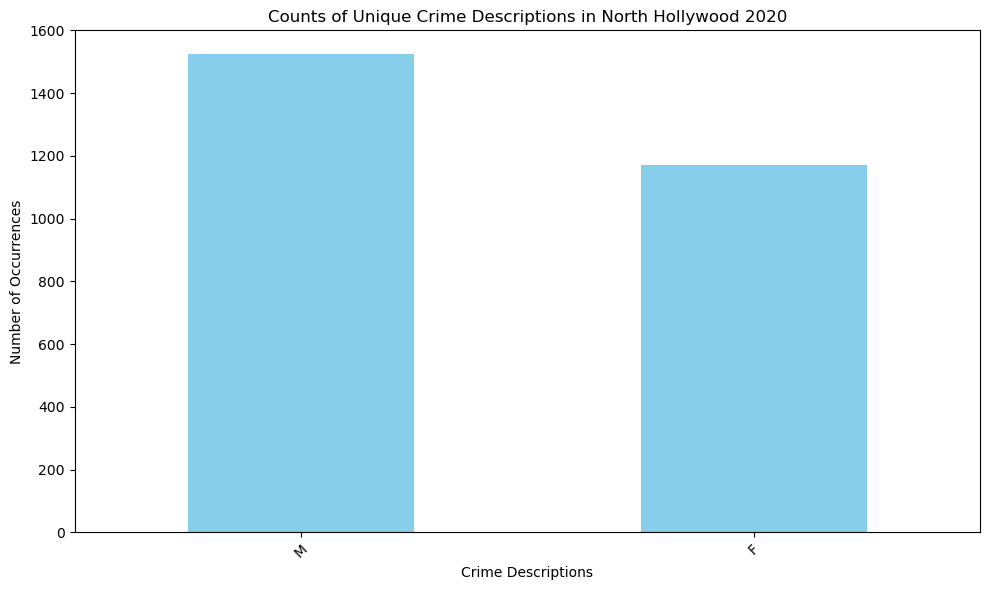

In [ ]:
# Plotting the histogram for the filtered data
plt.figure(figsize=(10,6))
n_hollywood_2023_top_gender.plot(kind='bar', color='skyblue')
plt.title("Counts of Unique Crime Descriptions in North Hollywood 2020")
plt.xlabel("Crime Descriptions")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
n_hollywood_2020_top_des = n_hollywood_2020['Vict Descent'].value_counts()
n_hollywood_2021_top_des = n_hollywood_2021['Vict Descent'].value_counts()
n_hollywood_2022_top_des = n_hollywood_2022['Vict Descent'].value_counts()
n_hollywood_2023_top_des = n_hollywood_2023['Vict Descent'].value_counts()

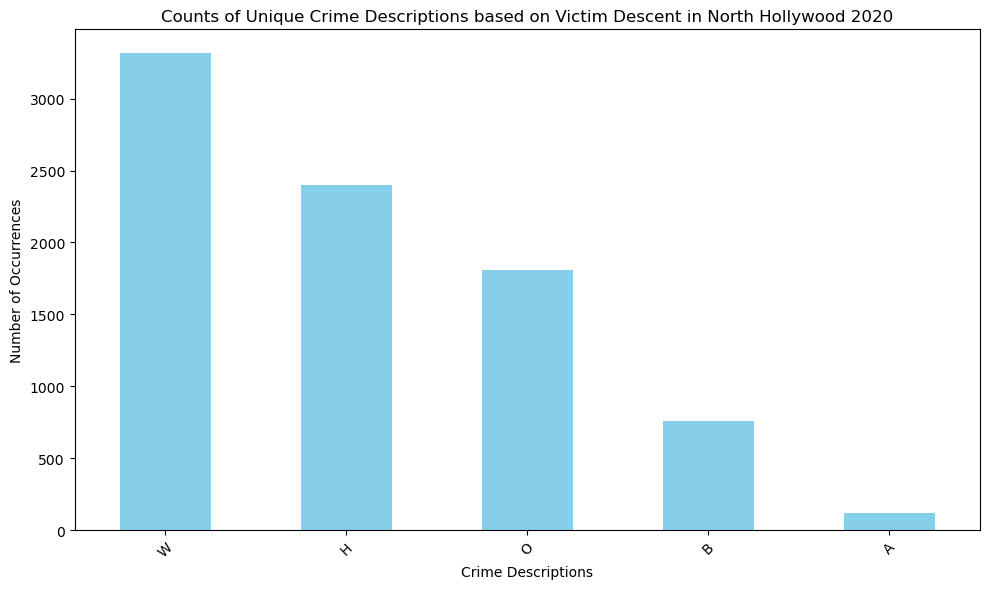

In [ ]:
# Plotting the histogram for the filtered data
plt.figure(figsize=(10,6))
n_hollywood_2020_top_des.plot(kind='bar', color='skyblue')
plt.title("Counts of Unique Crime Descriptions based on Victim Descent in North Hollywood 2020")
plt.xlabel("Crime Descriptions")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

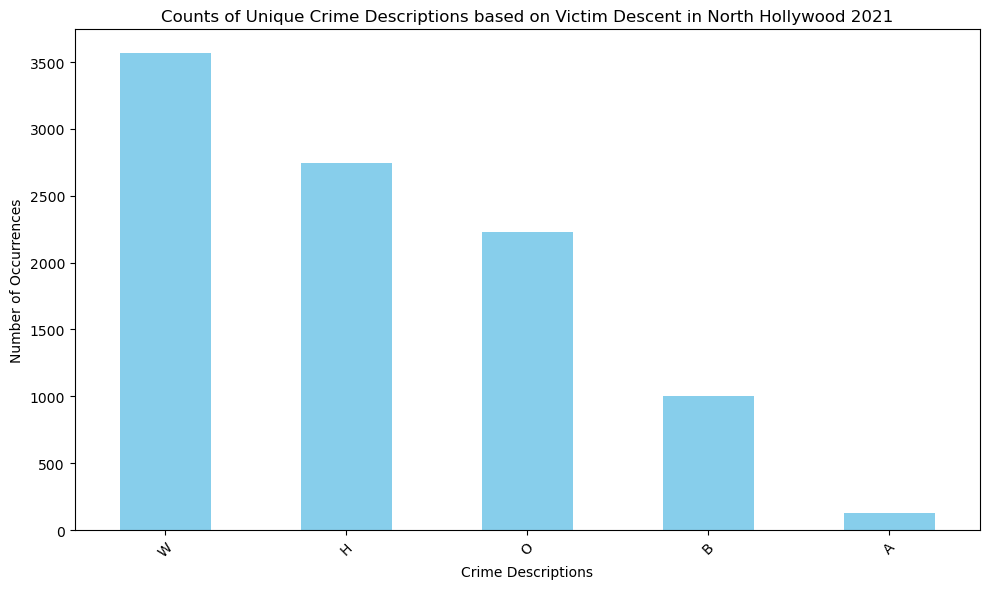

In [ ]:
# Plotting the histogram for the filtered data
plt.figure(figsize=(10,6))
n_hollywood_2022_top_des.plot(kind='bar', color='skyblue')
plt.title("Counts of Unique Crime Descriptions based on Victim Descent in North Hollywood 2021")
plt.xlabel("Crime Descriptions")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

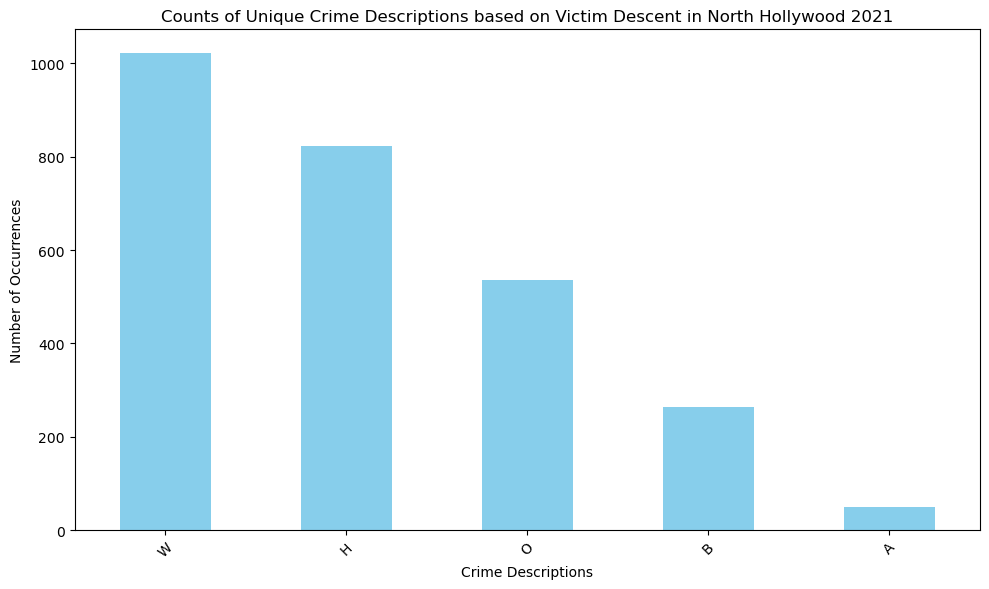

In [ ]:
# Plotting the histogram for the filtered data
plt.figure(figsize=(10,6))
n_hollywood_2023_top_des.plot(kind='bar', color='skyblue')
plt.title("Counts of Unique Crime Descriptions based on Victim Descent in North Hollywood 2021")
plt.xlabel("Crime Descriptions")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()